# ```aggregate```: Simple Examples

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from IPython.core.display import HTML, display
from importlib import reload

# pandas options 
pd.set_option('max_rows', 50)
pd.set_option('max_columns', 30)
pd.set_option('display.max_colwidth', 150)

# matplotlib and plotting options 
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# seaborn options 
sns.set(context='paper', style='darkgrid', font='serif')
# sns.set(context='paper', style='ticks', font='serif')

# warnings
import warnings
# warnings.simplefilter('error')
# warnings.simplefilter('ignore')
import logging
logging.getLogger("matplotlib").setLevel(logging.CRITICAL)

In [2]:
# this file is in examples
from importlib import reload
import sys
sys.path.insert(0,'..')
import aggregate as agg

import aggregate.parser as parser
import aggregate.underwriter as trash

uw = trash.Underwriter(debug=False)

In [ ]:
uw

In [ ]:
uw.list().T

In [ ]:
uw.describe().head()

In [ ]:
uw.update = False

## Create a simple aggregate distribution, plot and statistics

In [ ]:
xx = uw('agg newAgg 10 claims sev lognorm 12 cv 1.75 poisson note{here is note}')

In [ ]:
xx

In [ ]:
uw['newAgg']

In [ ]:
xx.recommend_bucket(16)

In [ ]:
# trial and error shows 0.1 has lower CV error 
xx.update(np.arange(1<<16, dtype=float) * 0.1)
xx

In [ ]:
xx.audit_df

In [ ]:
xx.plot()

In [ ]:
xx.plot('long')

In [ ]:
xx.report('audit')

In [ ]:
display(xx.audit_df)
display(xx.statistics_df)
display(xx.statistics_total_df)

## Portfolio Examples

In [ ]:
testa = f"""
port Complex~Portfolio~Mixed
    agg LineA  50  claims           sev lognorm 12 cv [2, 3, 4] wt [.3 .5 .2] mixed gamma 0.4
    agg LineB  24  claims 10 x 5    sev lognorm 12 cv [{', '.join([str(i) for i in np.linspace(2,5, 20)])}] wt=20 mixed gamma 0.35
    agg LineC 124  claims 120 x 5   sev lognorm 16 cv 3.4                     mixed gamma 0.45
"""

testb = """
port Complex~Portfolio
    agg Line3  50  claims [5 10 15] x 0         sev lognorm 12 cv [1, 2, 3]        mixed gamma 0.25
    agg Line9  24  claims [5 10 15] x 5         sev lognorm 12 cv [1, 2, 3] wt=3   mixed gamma 0.25
"""

testc = """
port Portfolio~2 
    agg CA 500 prem at .5 lr 15 x 12  sev gamma 12 cv [2 3 4] wt [.3 .5 .2] mixed gamma 0.4
    agg FL 1.7 claims 100 x 5         sev 10000 * pareto 1.3 - 10000        poisson
    agg IL 1e-8 * agg.CMP
    agg OH agg.CMP * 1e-8
    agg NY 500 prem at .5 lr 15 x 12  sev [20 30 40 10] * gamma [9 10 11 12] cv [1 2 3 4] wt =4 mixed gamma 0.4

sev proda 30000 * lognorm 2
"""

testd = """
sev prodc:   50000 * lognorm(3) 
sev weird    50000 * beta(1, 4) + 10000
sev premsop1 25000 * lognorm 2.3; sev premsop2 35000 * lognorm 2.4;
sev premsop3 45000 * \
lognorm 2.8
"""

teste = """
agg Agg1     20 claims 10 x 2 sev lognorm 12 cv 0.2 mixed gamma 0.8
agg Agg2     20 claims 10 x 2 sev 15 * lognorm 2.5  poisson;
sev premsop1 25000 * lognorm 2.3; 
agg Agg3     20 claims 10 x 2 on 25 * lognorm 2 fixed;
"""

testall = testa + testb + testc + testd + teste
# write test is a debug mode 
a, b, c = uw.write_test(testall)
# del b['note']
agg.html_title('Severities')
display(a)
agg.html_title('Aggregates')
display(b)
agg.html_title('Portfolios')
display(c)

In [ ]:
uw['LineA']

In [ ]:
uw.update = True
uw.log2 = 12

In [ ]:
# actually create a LineA object
print(uw['LineA'])
ob = uw('LineA')
ob

In [ ]:
ob.plot()

In [ ]:
ob.audit_df

In [ ]:
uw['PPAL']

In [ ]:
ob = uw('PPAL')
display(ob.statistics_df)
ob.sevs[0].plot()

In [ ]:
p.audit_df

In [ ]:
p.statistics_df.T.filter(regex='agg') # .loc[(slice(None), ['mean', 'cv', 'skew']), :]

In [ ]:
uw.update=True
if 1:
    print(f'Script:\n{testa}')
    p = uw.write(testa, log2=16, bs=0.2)
else:
    print(f'Script:\n{testb}')
    p = uw.write(testb, log2=16, bs=0.04)
p.plot(subplots=True)
p

In [ ]:
p.report('all')

In [ ]:
for a in p:
    display(a.statistics_df)
    display(a.statistics_total_df)

In [ ]:
for ag in p:
    # the underlying aggregates
    display(ag) 
    m = np.sum(ag.xs * ag.agg_density)
    m2 = np.sum(ag.xs**2 * ag.agg_density)
    print(m, np.sqrt(m2 - m*m) / m)
#     ag.plot()
#     display(ag.statistics_df)
#     display(ag.statistics_total_df)

In [ ]:
uw('liabc').plot()

In [ ]:
ag = uw('PPAL')
ag.easy_update(14)
ag

In [ ]:
uw['quake']

In [ ]:
reload(trash)
uw = trash.Underwriter()

In [ ]:
pf = uw('BODOFF1')
pf.update(8, 1) 
pf

In [ ]:
pf.plot('density')

In [ ]:
uw['CMP']

In [ ]:
ob = uw('agg MYCMP 0.01 *agg.CMP')
ob.easy_update()
ob.plot()

In [ ]:
ob

In [ ]:
sv = agg.Severity('lognorm', sev_mean = 1000, sev_cv = 0.5)

In [ ]:
sv.plot()

In [ ]:
c = uw.write('port test agg myCMP 0.01 * agg.CMP') 

In [ ]:
c.recommend_bucket()

In [ ]:
c.update(log2=13, bs=100000)

In [ ]:
c.plot(subplots=True, height=4)

In [ ]:
c

In [ ]:
biz = uw['Homeowners'] 
print(f'Type: {type(biz)}\nstr:  {biz}\nrepr: {repr(biz)}')
display(biz)

In [ ]:
biz = uw('Homeowners')
print(f'Type: {type(biz)}\nstr:  {biz}\nrepr: {repr(biz)}')
display(biz)

In [ ]:
biz.easy_update(10)
print(f'Type: {type(biz)}\nstr:  {biz}\nrepr: {repr(biz)}')
display(biz)
biz.report('audit')

In [ ]:
biz.recommend_bucket(verbose=True)

In [ ]:
biz.easy_update(10, verbose=True)

In [ ]:
biz.audit_df

In [ ]:
biz.report('all')

# Script Examples

In [ ]:
reload(trash)
uw = trash.Underwriter()

In [ ]:
s = uw.write('sev MyLN1 12 * lognorm 1; sev MyLN2 12 * lognorm 2; sev MyLN3 12 * lognorm 3; ')

In [ ]:
uw.describe('severity')

In [ ]:
for v in s:
    print(v.moms())
    v.plot()
print([ 12 * np.exp(x*x/2) for  x in [1,2,3]])

In [ ]:
pf = uw.write('port test: agg PA  0.0085 * agg.PersAuto agg CA: 0.02 * agg.CommAuto agg WC: 0.005 * agg.WorkComp', 
              update=True, log2=16, bs=25e4, remove_fuzz=True, add_exa=False)

In [ ]:
pf

In [ ]:
pf.report('quick')

In [ ]:
pf._add_exa()
pf.plot('audit', aspect=1.4, height=2.25)

## More complex program 

In [ ]:
uw.update=True
uw.log2 = 13
uw.bs = 0.25
uw
warnings.simplefilter('always')

In [ ]:
ans = uw.write("""port MyFirstPortfolio
    agg A1: 50  claims          sev gamma 12 cv .30 (mixed gamma 0.014)
    agg A2: 50  claims 30 xs 10 sev gamma 12 cv .30 (mixed gamma 0.014)
    agg A3: 50  claims          sev gamma 12 cv 1.30 (mixed gamma 0.014)
    agg A4: 50  claims 30 xs 20 sev gamma 12 cv 1.30 (mixed gamma 0.14)
    agg B 15 claims 15 xs 15 sev lognorm 12 cv 1.5 + 2 mixed gamma 4.8
    agg Cat 1.7 claims 25 xs 5  sev 25 * pareto 1.3 0 - 25 poisson 
    agg ppa: 1e-8 * agg.PPAL
""", add_exa=False, remove_fuzz=True, trim_df=False)

In [ ]:
ans

In [ ]:
ans.statistics_df

In [ ]:
ans.recommend_bucket()

In [ ]:
ans.update(14, 1, remove_fuzz=True)
ans

In [ ]:
ans.plot('density', subplots=True, logy=True)

In [ ]:
ans.report('audit')

In [ ]:
for a in ans:
    display(a)

In [ ]:
ans.report()

In [ ]:
ans.density_df.filter(regex='^exa').head()

In [ ]:
for col in ['Cat']:
    print(col)
#     t1 = ans.density_df.loc[:, 'e_' + col]
    t2 = ans.density_df.loc[:, 'exa_' + col]
    print(t2[np.isnan(t2)] )

In [ ]:
type(t2)

# Integrated Parser

In [ ]:
uw = agg.Underwriter(debug=True)

In [ ]:
program1 = """port Program1
    agg A:    50  claims,             sev  gamma 12 cv .30          mixed gamma 0.014
    agg Ba:  500 loss,                sev lognorm 50 cv .8  poisson
    agg Bb:  500 loss,  1000 xs 0     sev lognorm 50 cv .8  poisson
    agg Bg:  500 loss,                sev gamma 50 cv .8    poisson
    agg C:   500  loss,      75 xs 25, sev lognorm 50 cv .9  poisson
    agg D:    25  claims,    30 xs 20,  sev gamma 12 cv 1.30         (mixed gamma 0.85)
    agg Cat1:  1.7 claims,  125 xs 5,   sev 25 * pareto 1.3 - 25  poisson
    agg Cat2:  3.5 claims, 1000 xs 0,  sev 25 * pareto 2.3 0 - 25 poisson
"""
program2 = """port Program2
    agg Thick:  500 loss,            sev lognorm 50 cv .8  poisson
    agg Thin:  500 loss,  1000 xs 0  sev lognorm 50 cv .8  poisson
    agg Cat:  2 claims,  1250 xs 5,  sev 25 * pareto 1.3 - 25   poisson
"""

program3 = '''port Program3
    agg Cat: 50000000 loss 1e9 xs 0 sev 50000000 * pareto 1.3 - 50000000   poisson
    agg MyWC: 0.005 * agg.WorkComp
    agg HeterogCA: agg.CommAuto * 0.002 ;
    agg HomogCA: 0.001 * agg.CommAuto'''
# TODO: if agg Cat is at the end there is a parse error 

In [ ]:
ans1 = uw.write(program1, log2=13, bs=0.5, remove_fuzz=True, trim_df=False)

In [ ]:
ans2 = uw.write(program2, log2=10, remove_fuzz=True, trim_df=False)
ans3 = uw.write(program3, log2=11, padding=2, remove_fuzz=True, trim_df=False)
# %timeit ans = uw.write(program, 'script example', False) #, False, log2=13, bs=0.5, remove_fuzz=True, trim_df=False)
ans = [ans1, ans2, ans3]

In [ ]:
for a in ans:
    a.report()
    a.plot('density', subplots=True, logy=True)

# Distortions and Pricing

In [ ]:
portfolio_program = """port distortionTest
	agg mix    50 claims              [50, 100, 150, 200] xs 0  sev lognorm 12 cv [1,2,3,4]    poisson          
	agg low    500 premium at 0.5     5 xs 5                    sev gamma 12 cv .30            mixed gamma 0.2
	agg med    500 premium at 0.5 lr  15 xs 10                  sev gamma 12 cv .30            mixed gamma 0.4  
	agg xsa    50  claims             30 xs 10                  sev gamma 12 cv .30            mixed gamma 1.2  
	agg hcmp   1e-8 * agg.CMP                                                                                  
    agg ihmp   agg.PPAL * 1e-8
"""

In [ ]:
uw['PPAL']

In [ ]:
uw.update = False
port = uw.write(portfolio_program)

In [ ]:
port.update(log2=13, bs=10)
port

In [ ]:
a = agg.axiter_factory(None, 24, aspect=1.4, height=2)
port.plot('quick', axiter=a)
port.plot('density', axiter=a, subplots=True, aspect=1.4, height=2)
port.plot('density', axiter=a, subplots=True, aspect=1.4, height=2, logy=True, ylim=[1e-10, 1e-2])
a.tidy()
agg.suptitle_and_tight('Density Plots for Portfolio 1')

In [ ]:
port.plot('audit', aspect=1.2, height=2.5)

In [ ]:
port.plot('priority', aspect=1.2, height=2.5)

In [ ]:
port.uat(verbose=True,);

In [ ]:
K = port.q(0.995)  # Resonable capital scale
LR = 0.925
K

In [ ]:
cd = port.calibrate_distortions(LRs=[LR], As=[K])

In [ ]:
cd

In [ ]:
dd = agg.Distortion.distortions_from_params(cd, (K, LR), plot=True)

In [ ]:
dd

In [ ]:
ans_table, ans_stacked = port.apply_distortions(dd, As=[port.q(0.99), port.q(0.995), port.q(0.999)], num_plots=2)

# Another Interesting Example

In [ ]:
uw  = trash.Underwriter(update=False)

In [ ]:
uw['Cata'], uw['cata']

In [ ]:
b = uw('agg mycat2 2 claims sev sev.Cata poisson')

In [ ]:
b = uw('agg mycat2 2 claims sev sev.cata poisson')

In [ ]:
uw['mycat2']

In [ ]:
b = uw('agg mycat2 2 claims sev agg.Cata poisson')

In [ ]:
b

In [ ]:
cata = uw('agg mycat 4 claims sev 1000 * sev.cata poisson')
cata.easy_update(11)
cata.plot()

In [ ]:
uw['mycat'] # GOHERE

In [ ]:
cata = uw('agg mycat 4 claims sev 1000 * pareto 2.1 - 1000 poisson')
cata

In [ ]:
cata.easy_update(11)
cata.plot()

In [ ]:
cata

In [ ]:
uw['mycat']

In [ ]:
uw.update = False
uw.log2 = 11
ag = uw('agg myCatA 2 claims sev  1000 * pareto 2.1 - 1000 fixed')
# ag.plot()
# ag = uw.write('agg myCatA 2 claims sev 10000*agg.cata fixed')
ag.update(50. * np.arange(1<<11), padding=1, verbose=False )
ag.plot()

In [ ]:
ag

In [ ]:
uw.update = False
uw.verbose = False
pf = uw("""port smallLarge 
    agg cat 2 claims sev 10000 * pareto 1.3  - 10000 poisson
    agg noncat 120 claims sev lognorm 1000 cv 0.5 poisson""")
pf

In [ ]:
pf.recommend_bucket()

In [ ]:
pf.update(log2=18, bs=10000, padding=1, add_exa=False)
pf.plot(subplots=True, logy=True)
pf

In [ ]:
pf

In [ ]:
pf.plot()

# Distortions

In [ ]:
agg.Distortion.available_distortions()

In [ ]:
agg.Distortion.test()

In [ ]:
agg.insurability_triangle()

In [ ]:
uw.update = False
# basic = uw('''
# port basic
#     ppa 4000 claims 1e6 x 0 sev lognorm 10000 cv 15
#     ho  800 claims 2e6 x 0 sev gamma 50000 cv 10
#     cat 2 claims 20e6 x 0 sev 1e5 * pareto 2.1 - 1e5
# ''')

In [ ]:
# this is about Intereseting_Cat Example See LCA_08_25
# 
basic = uw('''
port basic
    agg attrit 10000 claims 500 x 0 sev lognorm 1 cv 1.75 mixed gamma 0.5
    agg paretoccat 2 claims      sev 50 * pareto 1.25 - 50 poisson
    agg lognccat  3.5 claims 40e3 x 0 sev 200 * lognorm 1.25 poisson
''')

In [ ]:
basic.recommend_bucket()

In [ ]:
basic.update(14, 10,  add_exa=True, remove_fuzz=True, approx_freq_ge=100, approx_type='slognorm', discretization_calc='distribution', trim_df=False)
basic

In [ ]:
basic.plot('quick')
basic.plot('density', subplots=True)
basic.plot('density', subplots=True, logy=True)
basic.plot('density', aspect=1.9, logy=True)

In [ ]:
bfit = uw(basic.fit())

In [ ]:
bfit.update(basic.density_df.loss.values)

In [ ]:
bfit2 = basic.collapse()

In [ ]:
bfit.plot()

In [ ]:
plt.plot(basic.density_df.loss, basic.density_df.p_total, label='exact')
plt.plot(bfit.xs, bfit.agg_density, label='approx')
plt.yscale('log')
plt.legend()

In [ ]:
xs = basic.density_df.loss
print(np.sum(xs * basic.density_df.p_total))
print(np.sum(xs * bfit.agg_density))

In [ ]:
 bfit.agg_density.sum()

# The plot of EXEQA is very intesting... different behaviours at different size losses

In [ ]:
axiter = agg.axiter_factory(None, 24, aspect=1.4)
distort = agg.Distortion('wang', 2.25)
df, audit = basic.apply_distortion(distort, axiter)

In [ ]:
params = basic.calibrate_distortions(LRs=[0.85, 0.90], Ps=[0.99, 0.98], r0=0.025)
params

In [ ]:
gs = agg.Distortion.distortions_from_params(params, (basic.q(0.99), 0.85), r0=0.025)

In [ ]:
gs

#### The first apply distortion was random and extreme. Now we apply Wang with a more reasonable shift. 

In [ ]:
axiter = agg.axiter_factory(None, 24, aspect=1.25)
df, au = basic.apply_distortion(gs['ly'] , axiter)

In [ ]:
test = basic.top_down(gs, 0.99)

In [ ]:
ans = basic.apply_distortions(gs, Ps=[0.98, 0.99], num_plots=3)

In [ ]:
a, p, test, arams, dd, table, stacked = basic.uat(LRs=[0.9], verbose=True)

In [ ]:
basic.density_df.filter(regex='exa[g]?_[st][a-z]+$').plot(kind='line')

In [ ]:
table

In [ ]:
uw('sev stepEg dhistogram xps [0, 1, 2, 3, 4] [.2, .3, .4, .05, .05]  ').plot()

In [ ]:
uw('sev stepEg chistogram xps [0, 1, 2, 3, 4] [.2, .3, .4, .05, .05]  ').plot()

In [ ]:
uw('sev stepEg dhistogram xps [0, 1, 2, 3, 4] .2 ').plot()

In [ ]:
uw('sev stepEg chistogram xps [0, 1, 2, 3, 4] .2 ').plot()

In [ ]:
fixed = uw('sev my chistogram xps [0,1,2,3,4] [.1,.2,.3, 0, .4]')
fixed.plot()
fixed.moms()==(2.9000000000000004, 10.449999999999999, 41.825000000000003)

#### A fixed distribution is just a discrete histogram with only one value

In [ ]:
fixed = uw('sev my dhistogram xps [2] [1]')
fixed.plot()
fixed.moms() == (2, 4, 8)

In [ ]:
# cts version is uniform? How exactly is this working?! 
fixed = uw('sev my chistogram xps [0 2] [0 1]')
fixed.plot()
fixed.moms() == (2, 4, 8)

In [ ]:
reload(trash)
uw = trash.Underwriter()
uw.update = True
uw.verbose = True
uw.log2 = 10

In [ ]:
s = f'''agg logo 1 claim {np.linspace(10, 250, 15)} sev lognorm 100 cv {np.linspace(.2, 10, 15)} fixed'''

In [ ]:
s = f'''agg logo 1 claim {np.linspace(10, 500, 100)} xs 0 sev lognorm 100 cv 1 fixed'''

In [ ]:
print(s)

In [ ]:
logo = uw.write(s, update=False)
logo.recommend_bucket(verbose=True)

In [ ]:
uw['logo']
N = 2**14
bs = 1
xs = np.linspace(0, bs * N, N, endpoint=False)
junk = logo.update(xs, verbose=True)

In [ ]:
logo.plot()

In [ ]:
# can get the dictionary 
uw['logo']

In [ ]:
s = f'agg FixedClaim 1 claim sev dhistogram xps [5 10 20 ] [.5 .25 .25 ] fixed'
print(s)

In [ ]:
uw.update = True
uw.verbose = True
uw.log2 = 8
fixed = uw.write(s, approximation='exact')
fixed.plot('quick')
fixed

In [ ]:
a = fixed.update(1.0 * np.arange(256), verbose=True)
display(a)

In [ ]:
fixed.plot('quick')

In [ ]:
warnings.simplefilter('default')
fixed.plot('long')

In [ ]:
uw.update = True
uw.log2 = 1

In [ ]:
uw.update = True
# interesting = uw("""agg home 1 claim sev 20 * triang 0.5 fixed""")
interesting = uw("""agg home 1 claim sev 20 * uniform fixed""")
interesting.plot()

In [ ]:
uw.update = False
interesting1 = uw("""
port easy
    agg home 1 claim sev 20 * uniform fixed
    agg auto 1 claim sev 50 * triang 0.5 fixed
""")
interesting2 = uw("""
port easy
    agg home 2 claim sev 30 * uniform + 4 fixed
    agg auto 1 claim sev 50 * uniform + 2 fixed
""")

In [ ]:
interesting2

In [ ]:
interesting = interesting2
interesting.update(8, 1)
interesting

In [ ]:
interesting.plot()

In [ ]:
p = interesting
p.plot(kind='density', line='all')
p.plot(kind='collateral', line='auto', c=45, a=90)

In [ ]:
acc = []
for a in range(10, 150, 5):
    s, ans = p.analysis_collateral('home', c=0, a=a, debug=True)
    acc.append(s)
    # change percent here to move line up or down 
    s, ans = p.analysis_collateral('home', c=a*.9, a=a, debug=True)
    acc.append(s)
    s, ans = p.analysis_collateral('home', c=a, a=a, debug=True)
    acc.append(s)
res = pd.concat(acc).sort_index()
res = res.set_index('a')
res[['exa', 'ecac', 'lev']].plot(marker='o')
# display(res)
assert(np.allclose(res.query('c==0')['exa'], res.query('c==0')['ecac']))

## Credit Puzzle and Empirical Distortions 

https://www.bis.org/publ/qtrpdf/r_qt0312e.pdf

In [ ]:
oneyear= '''AAA 49.50 0.06 63.86 0.18 70.47 0.33 73.95 0.61
AA 58.97 1.24 71.22 1.44 82.36 1.86 88.57 2.70
A 88.82 1.12 102.91 2.78 110.71 4.71 117.52 7.32
BBB 168.99 12.48 170.89 20.12 185.34 27.17 179.63 34.56
BB 421.20 103.09 364.55 126.74 345.37 140.52 322.32 148.05
B 760.84 426.16 691.81 400.52 571.94 368.38 512.43 329.40'''

In [ ]:
oy = oneyear.split('\n')
oyo = [i.split(' ') for i in oy]
df = pd.DataFrame(oyo, columns=['rating', 's_13', 'el_13', 's_35', 'el_35', 's_57', 'el_57', 's_710', 'el_710'], dtype=float)
df = df.set_index('rating')
df = df.sort_index(axis=1)
df.columns = pd.MultiIndex.from_product((('el', 'spread'), ('1-3', '3-5', '5-7', '7-10')), names=['type', 'maturity'])
df

In [ ]:
for m in ('1-3', '3-5', '5-7', '7-10'):
    df[('lr', m)] = df[('el', m)] / df[('spread', m)]
df

In [ ]:
df['lr'].plot(kind='bar')

In [ ]:
temp = df.loc[:, [('el', '1-3'), ('spread', '1-3')]] / 10000
temp.columns =['el', 'spread']
temp.loc['AAAA', :] = (0,0)
temp = temp.sort_values('el')
temp.plot(x='el', y='spread')
temp

In [ ]:
from scipy.spatial import ConvexHull

hull = ConvexHull(temp)

plt.plot(temp.el, temp.spread, 'o')
for simplex in hull.simplices:
    print(simplex)
    plt.plot(temp.iloc[simplex, 0], temp.iloc[simplex, 1], 'k-')
plt.xlim(0, .002)
plt.ylim(0, 0.02)

# Audit from 08_28 on Sum of Parts

In [ ]:
uw['MASSTEST']

In [ ]:
mt = uw("""
port mass
    agg a 2 claims sev 10 * uniform + 5 fixed
    agg b 1 claim  sev 10 * uniform fixed
    agg c 1 claim  sev 15 * uniform fixed
""")

In [ ]:
mt.update(6, 1)

In [ ]:
mt.plot(height=3, aspect=1.5)

In [ ]:
a, p, test, params, dd, table, stacked = mt.uat(Ps=[0.95, .97], LRs=[0.9], r0=0.1, verbose=True)

In [ ]:
mt.plot()

In [ ]:
mt.fit(output='dict')

In [ ]:
mt.collapse()

In [ ]:
mt.xs

In [ ]:
uw['mt']

# Dealing with Meta objects

In [3]:
reload(trash)
uw = trash.Underwriter()

In [4]:
port = uw('port xx agg A1 5 claims sev lognorm 10 cv 2 poisson')
port.update(6, 10)
# port.plot()
# port

In [5]:
ag = uw('agg A2 12 claims sev lognorm 10 cv 0.5 mixed gamma .3')
ag.easy_update(9, 1)
# ag.plot()
# ag

In [ ]:
import scipy.stats as ss

def makeEg(port):
    ps = port.density_df.p_total.values
    xs = port.density_df.loss.values
    bs = xs[1]
    xss = np.hstack((-bs*1e-7, 0, xs[1:]-bs/2, xs[-1]+bs/2))
    pss = np.hstack((ps[0]/1e-7, 0, ps[1:]))
    fz = ss.rv_histogram((pss, xss))
    m = np.sum(xs * ps)
    v = np.sum(xs**2 * ps) - m*m
    print(m, v, fz.stats(), m / fz.stats()[0]-1)
    plt.plot(xs , np.cumsum(ps),  drawstyle='steps-post', label='orig')
    ex = np.arange(1000, dtype=float)*.1
    plt.plot(ex, fz.cdf(ex), label='approx',drawstyle='steps-post')
    plt.xlim(-0.5, 100)
    plt.ylim(0, 1)
    plt.legend()

In [ ]:
# makeEg(port)

In [6]:
metap = uw('sev MyMeta meta.port 6 10', globs=globals())

In meta, Portfolio name           xx             
Theoretic expected loss             50.0
Actual expected loss                46.2
Error                          -0.076078
Discretization size                    6
Bucket size                        10.00
<aggregate.port.Portfolio object at 0x000001979CA388D0>, <class 'aggregate.port.Portfolio'>


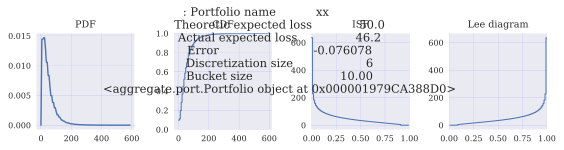

In [8]:
metap.plot()

In [10]:
metaport = uw('agg MyMetaAgg 1 claims 200 x 0 sev meta.port 6 10 fixed', globs=globals())

In meta, Portfolio name           xx             
Theoretic expected loss             50.0
Actual expected loss                46.2
Error                          -0.076078
Discretization size                    6
Bucket size                        10.00
<aggregate.port.Portfolio object at 0x000001979CA388D0>, <class 'aggregate.port.Portfolio'>


In [14]:
metaport.easy_update(10, 10)

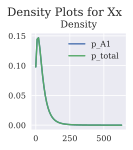

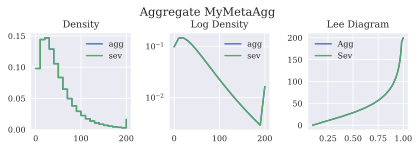

In [15]:
port.plot()
metaport.plot()